# Attempt 1 - Contributions & Gifts
Both datasets only have Lobbyist ID and not employer/client, so I combined them to see what could potentially work.
However, there are very, very few gifts and they're all pretty low value so it might not make sense to include them. 

In [ ]:
import pandas as pd

In [ ]:
contributions = pd.read_csv('data/Lobbyist_Data_-_Contributions (1).csv')
contributions.head()

,CONTRIBUTION_ID,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE
0,2240204276,07/01/2020,09/30/2020,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020
1,16680854,04/01/2020,06/30/2020,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020
2,146026078,01/01/2020,03/31/2020,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020
3,2237026963,10/01/2020,12/31/2020,12/18/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020
4,279679753,10/01/2020,12/31/2020,12/18/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020


In [ ]:
gifts = pd.read_csv('data/Lobbyist_Data_-_Gifts (1).csv')
gifts.head()

,GIFT_ID,PERIOD_START,PERIOD_END,GIFT,RECIPIENT_FIRST_NAME,RECIPIENT_LAST_NAME,RECIPIENT_TITLE,VALUE,DEPARTMENT,LOBBYIST_ID,LOBBYIST_FIRSTNAME,LOBBYIST_LASTNAME,CREATED_DATE
0,1579542053,07/01/2019,09/30/2019,0,CHARLES,SACKLEY,SVP SALES,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,21201,CHARLES,SACKLEY,03/03/2020
1,2384659718,10/01/2019,12/31/2019,0,CHARLES,SACKLEY,SVP SALES,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,21201,CHARLES,SACKLEY,03/03/2020
2,605159316,04/01/2019,06/30/2019,0,CHARLES,SACKLEY,SVP SALES,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,21201,CHARLES,SACKLEY,03/03/2020
3,3449892652,10/01/2020,12/31/2020,NONE,DAN,CASEY,"DEPUTY DIRECTOR PSIT, OEMC",0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,20210,KEN,LUKOWSKI,12/04/2020
4,694447715,10/01/2020,12/31/2020,NaN,NaN,NaN,NaN,0.0,"ASSETS, INFORMATION & SERVICES (AIS)",24286,TOM,FEENEY,12/18/2020


In [ ]:

lobbyists = pd.read_csv('data/Lobbyist_Data_-_Lobbyists (1).csv')
lobbyists.head()

,YEAR,LOBBYIST_ID,SALUTATION,FIRST_NAME,MIDDLE_INITIAL,LAST_NAME,SUFFIX,ADDRESS_1,ADDRESS_2,CITY,STATE,ZIP,COUNTRY,EMAIL,PHONE,FAX,EMPLOYER_ID,EMPLOYER_NAME,CREATED_DATE
0,2020,25061,MS.,VINCENZA,M,RAINERI,NaN,4721 N WASHTENAW,1ST FLOOR,CHICAGO,IL,60625,United States,enzaraineri@yahoo.com,7734999723,NaN,1422664373,VINCENZA RAINERI,12/01/2020
1,2020,24920,NaN,KATRINA,NaN,STEELE,NaN,"ONE FINANCIAL PLACE 440 S. LASALLE, STE 3300",NaN,CHICAGO,IL,60605,United States,Katrina.Steele@ComEd.com,708-705-3762,NaN,306922044,COMED,07/27/2020
2,2020,23981,NaN,ALEXANDRA,NaN,SIMS,NaN,318 W ADAMS ST,500C,CHICAGO,IL,60606,United States,alex@apsandassociates.com,2485350159,NaN,2498319453,VERIZON,12/01/2020
3,2020,4273,MR.,JACK,L,PARRINO,ESQ,"55 E. MONROE ST., 37TH FLR",NaN,CHICAGO,IL,60603,United States,jparrino@thompsoncoburn.com,312-346-7500,312-580-2201,2639700130,THOMPSON COBURN LLP,12/03/2020
4,2020,24798,NaN,JESSICA,NaN,SULLIVAN-WILSON,NaN,351 W. HUBBARD STREET,SUITE 805,CHICAGO,IL,60654,United States,jsullivan@e4e.org,219-455-4312,NaN,4196459327,EDUCATORS FOR EXCELLENCE,03/03/2020


In [ ]:
# Seeing how many lobbyists have multiple employers. 
# Mostly it looks like they have the same employer, just written out differently over the years
lobbyists.groupby('LOBBYIST_ID').agg({'YEAR': 'nunique', 
                                      'FIRST_NAME': 'min',
                                     'LAST_NAME': 'min',
                                     'EMPLOYER_ID': 'nunique',
                                     'EMPLOYER_NAME': 'unique'}).sort_values('EMPLOYER_ID', ascending = False)

,YEAR,FIRST_NAME,LAST_NAME,EMPLOYER_ID,EMPLOYER_NAME
LOBBYIST_ID,,,,,
4239,11,KEVIN,WOLFBERG,10,"[SCHAIN, BANKS, KENNY & SCHWARTZ, LTD., SCHAIN..."
3962,11,CHRIS,LEACH,10,"[AKERMAN LLP, SCHUYLER, ROCHE & CRISHAM, P.C.,..."
4156,9,JULIE,CONENNA,9,"[BANK OF AMERICA, N.A., BANK OF AMERICA, NA, B..."
3829,11,THOMAS,COVERICK,9,"[KEYBANC CAPITAL MARKETS, INC., KEYBANC CAPITA..."
5721,10,GENE,SCHULTER,8,"[SERVICENOW, TANIUM INC, FREEDMAN SEATING CO, ..."
...,...,...,...,...,...
10782,2,JONATHAN,BAYLOR,1,[NRG ENERGY INC.]
10781,1,BARRY,BERGLUND,1,"[NRG ENERGY, INC.]"
10641,1,CRAIG,GALLER,1,"[XEROX BUSINESS SERVICES, LLC]"


In [ ]:
# Prep for merge
contributions['Type'] = 'Contribution'
contributions.drop(columns = ['CONTRIBUTION_DATE'], inplace = True)
contributions.rename(columns = {'CONTRIBUTION_ID': 'id', }, inplace = True)
contributions.head()

,id,PERIOD_START,PERIOD_END,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Type
0,2240204276,07/01/2020,09/30/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020,Contribution
1,16680854,04/01/2020,06/30/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020,Contribution
2,146026078,01/01/2020,03/31/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020,Contribution
3,2237026963,10/01/2020,12/31/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020,Contribution
4,279679753,10/01/2020,12/31/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020,Contribution


In [ ]:
# Prep for merge
gifts['Type'] = 'Gift'
gifts['RECIPIENT'] = gifts['RECIPIENT_TITLE'] + " " + gifts['RECIPIENT_FIRST_NAME'] + " " + gifts['RECIPIENT_LAST_NAME']
gifts.drop(columns = ['RECIPIENT_TITLE', 'RECIPIENT_FIRST_NAME', 'RECIPIENT_LAST_NAME'], inplace = True)
gifts.rename(columns = {'GIFT_ID': 'id', 
                        'VALUE': 'AMOUNT', 
                        'LOBBYIST_FIRSTNAME': 'LOBBYIST_FIRST_NAME',
                        'LOBBYIST_LASTNAME': 'LOBBYIST_LAST_NAME'
                       }, inplace = True)
gifts.head()

,id,PERIOD_START,PERIOD_END,GIFT,AMOUNT,DEPARTMENT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Type,RECIPIENT
0,1579542053,07/01/2019,09/30/2019,0,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,21201,CHARLES,SACKLEY,03/03/2020,Gift,SVP SALES CHARLES SACKLEY
1,2384659718,10/01/2019,12/31/2019,0,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,21201,CHARLES,SACKLEY,03/03/2020,Gift,SVP SALES CHARLES SACKLEY
2,605159316,04/01/2019,06/30/2019,0,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,21201,CHARLES,SACKLEY,03/03/2020,Gift,SVP SALES CHARLES SACKLEY
3,3449892652,10/01/2020,12/31/2020,NONE,0.0,EMERGENCY MANAGEMENT & COMMUNICATIONS,20210,KEN,LUKOWSKI,12/04/2020,Gift,"DEPUTY DIRECTOR PSIT, OEMC DAN CASEY"
4,694447715,10/01/2020,12/31/2020,NaN,0.0,"ASSETS, INFORMATION & SERVICES (AIS)",24286,TOM,FEENEY,12/18/2020,Gift,NaN


In [ ]:
# Merging/concatenating the two datasets together
contributions_and_gifts = pd.concat([contributions, gifts], axis = 0)
contributions_and_gifts.head()

,id,PERIOD_START,PERIOD_END,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Type,GIFT,DEPARTMENT
0,2240204276,07/01/2020,09/30/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020,Contribution,NaN,NaN
1,16680854,04/01/2020,06/30/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020,Contribution,NaN,NaN
2,146026078,01/01/2020,03/31/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020,Contribution,NaN,NaN
3,2237026963,10/01/2020,12/31/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020,Contribution,NaN,NaN
4,279679753,10/01/2020,12/31/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020,Contribution,NaN,NaN


## Lite EDA

In [ ]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='PERIOD_START', ylabel='AMOUNT'>

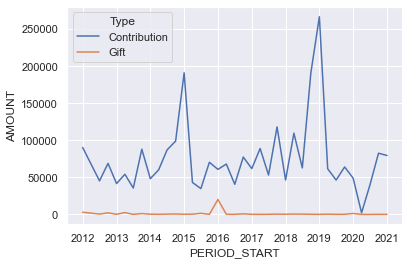

In [ ]:
# Gifts and Contributions over time
graph_data = contributions_and_gifts.groupby(['PERIOD_START', 'Type'])['AMOUNT'].sum().reset_index()
graph_data.head()
sns.lineplot(x = pd.to_datetime(graph_data['PERIOD_START']), y = graph_data['AMOUNT'], hue = graph_data['Type'])

In [ ]:
# Gifts given by department
graph_data = contributions_and_gifts[contributions_and_gifts['Type'] == 'Gift'].groupby(['DEPARTMENT'])['AMOUNT'].sum().sort_values(ascending = False)
graph_data

DEPARTMENT
TRANSPORTATION                                     20351.26
CITY COUNCIL / ALDERMEN                            12787.63
HOUSING AND ECONOMIC DEVELOPMENT                    1210.40
MAYORS OFFICE                                       1113.27
CITY TREASURER                                       585.97
CHICAGO HOUSING AUTHORITY                            518.63
PLANNING AND DEVELOPMENT                             517.09
FINANCE                                              353.96
CHICAGO PUBLIC SCHOOLS                               124.94
AVIATION                                              99.00
FIRE DEPARTMENT                                       82.00
PARK DISTRICT                                         65.00
POLICE DEPARTMENT                                     59.00
INNOVATION & TECHNOLOGY                               50.00
BUSINESS AFFAIRS AND CONSUMER PROTECTION (BACP)       50.00
COMMITTEES OF THE CITY COUNCIL                        46.00
WATER MANAGEMENT             

# Attempt 2 - Contributions Data only
* This made more sense to stick to just campaign contributions, so this section focuses on getting data on contributions and tying it to an alderman.
* The data for aldermen is currently only - meaning that aldermen from previous years dont get matched to contribution data.
* I tried to find some demographics per ward, and used crimes per ward as a proxy for 'wellness' of the ward. Final dataset is contributions mapped to a ward with crime stats.

In [ ]:
contributions = pd.read_csv('data/Lobbyist_Data_-_Contributions (1).csv')
contributions['Ward'] = 0
contributions.head()

,CONTRIBUTION_ID,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Ward
0,2240204276,07/01/2020,09/30/2020,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020,0
1,16680854,04/01/2020,06/30/2020,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020,0
2,146026078,01/01/2020,03/31/2020,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020,0
3,2237026963,10/01/2020,12/31/2020,12/18/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020,0
4,279679753,10/01/2020,12/31/2020,12/18/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020,0


In [ ]:
wards = pd.read_csv('Data/Ward_offices.csv')
wards['Last Name'] = wards['ALDERMAN'].str.split(',', expand = True)[0]
wards.head()

,WARD,ALDERMAN,ADDRESS,CITY,STATE,ZIPCODE,WARD PHONE,WARD FAX,EMAIL,WEBSITE,LOCATION,CITY HALL ADDRESS,CITY HALL CITY,CITY HALL STATE,CITY HALL ZIPCODE,CITY HALL PHONE,Last Name
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,Chicago,IL,60618.0,(773) 840-7880,NaN,Info@33rdward.org,NaN,"(41.95392, -87.703301)","121 North LaSalle Street, Room 200, Office 20",Chicago,IL,60602,(312) 744-3373,Rodriguez Sanchez
1,17,"Moore, David H.",1344 West 79th Street,Chicago,IL,60636.0,(773) 783-3672,(773) 783-3878,Alderman@17ward.com,http://www.David.Moore@cityofchicago.org,"(41.75044, -87.657221)","121 North LaSalle Street, Room 300, Office 37",Chicago,IL,60602,(312) 744-3435,Moore
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",Chicago,IL,60657.0,(773) 525-6034,(773) 525-5058,Ward44@cityofchicago.org,http://44thward.org/,"(41.940497, -87.654108)","121 North LaSalle Street, Room 304",Chicago,IL,60602,(312) 744-3073 / 3133,Tunney
3,37,"Mitts, Emma",5344 West North Avenue,Chicago,IL,60651.0,(773) 379-0960,(773) 773-0966,Ward37@cityofchicago.org,https://www.cityofchicago.org/city/en/about/wa...,"(41.909514, -87.759726)","121 North LaSalle Street, Room 300, Office 45",Chicago,IL,60602,(312) 744-3180 / 1589,Mitts
4,4,"King, Sophia D.",435 East 35th Street,Chicago,IL,60616.0,(773) 536-8103,773-536-7296,Ward04@cityofchicago.org,http://www.aldsophiaking.com,"(41.831135, -87.61541)","121 North LaSalle Street, Room 300, Office 29",Chicago,IL,60602,(312) 744-2690,King


,WARD,ALDERMAN,ADDRESS,CITY,STATE,ZIPCODE,WARD PHONE,WARD FAX,EMAIL,WEBSITE,LOCATION,CITY HALL ADDRESS,CITY HALL CITY,CITY HALL STATE,CITY HALL ZIPCODE,CITY HALL PHONE,Last Name
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,Chicago,IL,60618.0,(773) 840-7880,NaN,Info@33rdward.org,NaN,"(41.95392, -87.703301)","121 North LaSalle Street, Room 200, Office 20",Chicago,IL,60602,(312) 744-3373,Rodriguez Sanchez
1,17,"Moore, David H.",1344 West 79th Street,Chicago,IL,60636.0,(773) 783-3672,(773) 783-3878,Alderman@17ward.com,http://www.David.Moore@cityofchicago.org,"(41.75044, -87.657221)","121 North LaSalle Street, Room 300, Office 37",Chicago,IL,60602,(312) 744-3435,Moore
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",Chicago,IL,60657.0,(773) 525-6034,(773) 525-5058,Ward44@cityofchicago.org,http://44thward.org/,"(41.940497, -87.654108)","121 North LaSalle Street, Room 304",Chicago,IL,60602,(312) 744-3073 / 3133,Tunney
3,37,"Mitts, Emma",5344 West North Avenue,Chicago,IL,60651.0,(773) 379-0960,(773) 773-0966,Ward37@cityofchicago.org,https://www.cityofchicago.org/city/en/about/wa...,"(41.909514, -87.759726)","121 North LaSalle Street, Room 300, Office 45",Chicago,IL,60602,(312) 744-3180 / 1589,Mitts
4,4,"King, Sophia D.",435 East 35th Street,Chicago,IL,60616.0,(773) 536-8103,773-536-7296,Ward04@cityofchicago.org,http://www.aldsophiaking.com,"(41.831135, -87.61541)","121 North LaSalle Street, Room 300, Office 29",Chicago,IL,60602,(312) 744-2690,King


In [ ]:
# Loop through each contribution recipient to identify a matching ward number
for i in range(0,len(contributions)):
    #Try/Catch to avoid the nulls in the recipients column
    try:
        recipient = contributions.iloc[i,4].lower()        
        # Loop through each ward to see if an alderman's last name matches a word in the recipients column
        for j in range(0, len(wards)):
            ward = wards.iloc[j, 16].lower()
            if ward in recipient:
                # If there's a match, update the ward column
                contributions.iloc[i,10] = wards.iloc[j, 0]
    except:
        pass

contributions.head()

,CONTRIBUTION_ID,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Ward
0,2240204276,07/01/2020,09/30/2020,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020,49
1,16680854,04/01/2020,06/30/2020,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020,24
2,146026078,01/01/2020,03/31/2020,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020,36
3,2237026963,10/01/2020,12/31/2020,12/18/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020,0
4,279679753,10/01/2020,12/31/2020,12/18/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020,0


In [ ]:
contributions['Ward'] = contributions['Ward'].astype('int')

In [ ]:
# 47% match
contributions.isna().mean()

CONTRIBUTION_ID        0.000000
PERIOD_START           0.000000
PERIOD_END             0.000000
CONTRIBUTION_DATE      0.000000
RECIPIENT              0.012682
AMOUNT                 0.000000
LOBBYIST_ID            0.000000
LOBBYIST_FIRST_NAME    0.000000
LOBBYIST_LAST_NAME     0.000000
CREATED_DATE           0.000000
Ward                   0.000000
dtype: float64

# Add crimes data

In [ ]:
# This takes a while
crimes = pd.read_csv('Data/Crimes_-_2001_to_Present (1).csv')
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
# This.. also takes a while
# crimes = crimes[pd.to_datetime(crimes['Date']).dt.year >= 2018]

In [ ]:
crimes = crimes.groupby('Ward')['ID'].count()

In [ ]:
# Join number of crimes to ward contributions
contributions = contributions.merge(crimes, how = 'left', left_on = 'Ward', right_index = True)
contributions.rename(columns = {'ID': 'Crimes'})

,CONTRIBUTION_ID,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Ward,Crimes
0,2240204276,07/01/2020,09/30/2020,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020,49,95040.0
1,16680854,04/01/2020,06/30/2020,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020,24,264924.0
2,146026078,01/01/2020,03/31/2020,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020,36,70359.0
3,2237026963,10/01/2020,12/31/2020,12/18/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020,0,NaN
4,279679753,10/01/2020,12/31/2020,12/18/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5357,1426709614,01/01/2021,03/31/2021,02/18/2021,FRIENDS OF MICHAEL D RODRIGUEZ,500.0,18181,JOHN,DALEY,04/29/2021,22,77908.0
5358,4001371158,01/01/2021,03/31/2021,03/19/2021,FRIENDS OF WALTER BURNETT JR.,1500.0,18181,JOHN,DALEY,04/29/2021,27,248173.0
5359,4012672277,01/01/2021,03/31/2021,01/30/2021,CITIZENS FOR WAGUESPACK,1000.0,18181,JOHN,DALEY,04/29/2021,32,112512.0
5360,1622864983,01/01/2021,03/31/2021,03/22/2021,DANIEL LA SPATA,250.0,18181,JOHN,DALEY,04/29/2021,1,128707.0


In [ ]:
contributions.to_csv('contributions_with_ward_data.csv')